In [399]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import datetime
import os
import pandas as pd
from PIL import Image
from matplotlib import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint,ReduceLROnPlateau

Machine Amrta

In [400]:
filename = "C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Train_Foot.csv"
filename_test= 'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Test_Foot.csv'

Machine Dylane

In [323]:
filename = 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Train_Foot.csv'
filename_test= 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Test_Foot.csv'

In [401]:
# Chargement des données csv

data= pd.read_csv(filename,sep=";",index_col=0)

# y prend le score à prédire
y=data.score
data.head()


,date,homeTeam,awayTeam,score,mi_temps_gagnante,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam
0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,1,0.0,3.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2409,6154
1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,2,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4008,3054
2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,1,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3029,4815
3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2,2.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2803,2045
4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,1,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2156,1065


## Avec les win/lose cons

In [402]:
x=data[['puissance_HomeTeam','puissance_AwayTeam','win_cons_home','win_cons_away','lose_cons_home',
        'lose_cons_away','moy_goals_home','moy_goals_away','moy_goals_half_home','moy_goals_half_away',
       'moy_goals_conceded_home','moy_goals_conceded_away','moy_goals_conceded_half_home','moy_goals_conceded_half_away']]
x

,puissance_HomeTeam,puissance_AwayTeam,win_cons_home,win_cons_away,lose_cons_home,lose_cons_away,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away
0,2409,6154,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,4008,3054,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3029,4815,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2803,2045,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2156,1065,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,6451,15239,1,1,0,0,1.370370,2.814815,0.613757,1.439153,0.984127,1.037037,0.396825,0.433862
376,4273,5802,0,2,1,0,1.306878,1.164021,0.587302,0.497354,1.164021,1.412698,0.544974,0.656085
377,13709,4725,1,2,0,0,1.724868,1.253968,0.693122,0.608466,0.640212,1.407407,0.232804,0.640212
378,14840,4571,0,1,1,0,2.920635,1.444444,1.105820,0.682540,0.809524,1.391534,0.349206,0.640212


In [403]:
data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['date','status','id_match','homeTeam','awayTeam','idHomeTeam','idAwayTeam',
                        'puissance_HomeTeam','puissance_AwayTeam','win_cons_home','win_cons_away',
                        'lose_cons_home','lose_cons_away','moy_goals_home','moy_goals_away',
                        'moy_goals_half_home','moy_goals_half_away','moy_goals_conceded_home',
                        'moy_goals_conceded_away','moy_goals_conceded_half_home',
                        'moy_goals_conceded_half_away']]
x_prediction

,date,status,id_match,homeTeam,awayTeam,idHomeTeam,idAwayTeam,puissance_HomeTeam,puissance_AwayTeam,win_cons_home,...,lose_cons_home,lose_cons_away,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away
1082,2020-06-30,FINISHED,273885,FC Barcelona,Club Atlético de Madrid,81,78,13105,9329,0,...,0,0,2.102564,1.325000,1.025641,0.475000,0.950000,0.750000,0.400000,0.375000
1980,2020-06-30,FINISHED,274432,Vitória SC,Vitória FC,5543,5620,3593,3593,0,...,1,2,1.642857,0.785714,0.678571,0.285714,1.142857,1.250000,0.678571,0.535714
1982,2020-07-01,FINISHED,274433,Os Belenenses Futebol,CD Tondela,5568,1049,1589,1729,0,...,2,2,0.857143,0.821429,0.571429,0.392857,1.571429,1.250000,0.678571,0.750000
1983,2020-07-01,FINISHED,274431,Sporting Clube de Portugal,Gil Vicente FC,498,5533,5314,1346,3,...,0,0,1.607143,1.071429,0.892857,0.428571,1.035714,1.250000,0.428571,0.678571
1083,2020-07-01,FINISHED,273886,Valencia CF,Athletic Club,95,77,9770,9286,0,...,2,0,1.350000,1.125000,0.475000,0.625000,1.906250,0.875000,0.937500,0.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,SCHEDULED,274477,Sport Lisboa e Benfica,Sporting Clube de Portugal,1903,498,6562,5314,1,...,0,0,2.000000,1.566667,0.694444,0.866667,1.166667,1.000000,0.433333,0.400000
2025,2020-07-26,SCHEDULED,274478,Vitória FC,Os Belenenses Futebol,5620,5568,3593,1589,0,...,5,1,0.774194,0.833333,0.322581,0.566667,1.366667,1.666667,0.566667,0.700000
2026,2020-07-26,SCHEDULED,274479,CD Santa Clara,Vitória SC,5530,5543,3175,3593,0,...,2,0,0.966667,1.633333,0.400000,0.666667,1.200000,1.066667,0.500000,0.633333
2027,2020-07-26,SCHEDULED,274480,Portimonense SC,CD Aves,5601,5544,1067,1159,0,...,1,0,0.800000,0.774194,0.400000,0.483871,1.290323,1.903226,0.580645,0.741935


## Sans les win/lose/cons et les moyennes half_time plus utiles pour les modèles de predic mi-temps

In [404]:
x=data[['puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away','moy_goals_conceded_home',
        'moy_goals_conceded_away']]

data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['date','status','id_match','homeTeam','awayTeam','idHomeTeam','idAwayTeam',
                        'puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away',
                        'moy_goals_conceded_home','moy_goals_conceded_away']]
x_prediction

,date,status,id_match,homeTeam,awayTeam,idHomeTeam,idAwayTeam,puissance_HomeTeam,puissance_AwayTeam,moy_goals_home,moy_goals_away,moy_goals_conceded_home,moy_goals_conceded_away
1082,2020-06-30,FINISHED,273885,FC Barcelona,Club Atlético de Madrid,81,78,13105,9329,2.102564,1.325000,0.950000,0.750000
1980,2020-06-30,FINISHED,274432,Vitória SC,Vitória FC,5543,5620,3593,3593,1.642857,0.785714,1.142857,1.250000
1982,2020-07-01,FINISHED,274433,Os Belenenses Futebol,CD Tondela,5568,1049,1589,1729,0.857143,0.821429,1.571429,1.250000
1983,2020-07-01,FINISHED,274431,Sporting Clube de Portugal,Gil Vicente FC,498,5533,5314,1346,1.607143,1.071429,1.035714,1.250000
1083,2020-07-01,FINISHED,273886,Valencia CF,Athletic Club,95,77,9770,9286,1.350000,1.125000,1.906250,0.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,SCHEDULED,274477,Sport Lisboa e Benfica,Sporting Clube de Portugal,1903,498,6562,5314,2.000000,1.566667,1.166667,1.000000
2025,2020-07-26,SCHEDULED,274478,Vitória FC,Os Belenenses Futebol,5620,5568,3593,1589,0.774194,0.833333,1.366667,1.666667
2026,2020-07-26,SCHEDULED,274479,CD Santa Clara,Vitória SC,5530,5543,3175,3593,0.966667,1.633333,1.200000,1.066667
2027,2020-07-26,SCHEDULED,274480,Portimonense SC,CD Aves,5601,5544,1067,1159,0.800000,0.774194,1.290323,1.903226


In [405]:
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

y_train = y_train.astype(np.int)
classes=np.unique(y_train)
nbClasses=len(classes)
print(x_train.shape,y_train.shape)
print(nbClasses)


(9232, 6) (9232,)
3


In [406]:
x_train.shape[1]

6

In [407]:
def create_model():
    
    model = Sequential()
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(5, activation='softmax'))    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [408]:
model = create_model()
print(model.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_177 (Dense)            (None, 512)               3584      
_________________________________________________________________
dense_178 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_179 (Dense)            (None, 512)               66048     
_________________________________________________________________
dense_180 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_181 (Dense)            (None, 512)               66048     
_________________________________________________________________
dense_182 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_183 (Dense)            (None, 512)             

In [409]:
save = ModelCheckpoint('model_Foot_Win_All_Col.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)

In [410]:
history = model.fit(x_train, y_train,validation_data=(x_test,y_test),batch_size=90,epochs=100,
                    callbacks = [save])

Train on 9232 samples, validate on 2308 samples
Epoch 1/100
8910/9232 [===========================>..] - ETA: 0s - loss: 16.1365 - accuracy: 0.4104
Epoch 00001: val_accuracy improved from -inf to 0.48700, saving model to model_Foot_Win_All_Col.h5
9232/9232 [==============================] - 3s 281us/sample - loss: 15.6186 - accuracy: 0.4152 - val_loss: 1.4363 - val_accuracy: 0.4870
Epoch 2/100
9180/9232 [============================>.] - ETA: 0s - loss: 1.1677 - accuracy: 0.4825
Epoch 00002: val_accuracy improved from 0.48700 to 0.50693, saving model to model_Foot_Win_All_Col.h5
9232/9232 [==============================] - 2s 177us/sample - loss: 1.1678 - accuracy: 0.4825 - val_loss: 1.0860 - val_accuracy: 0.5069
Epoch 3/100
8910/9232 [===========================>..] - ETA: 0s - loss: 1.0975 - accuracy: 0.5000
Epoch 00003: val_accuracy improved from 0.50693 to 0.51127, saving model to model_Foot_Win_All_Col.h5
9232/9232 [==============================] - 2s 164us/sample - loss: 1.0965 

Epoch 28/100
9000/9232 [============================>.] - ETA: 0s - loss: 0.9779 - accuracy: 0.5344
Epoch 00028: val_accuracy did not improve from 0.52816
9232/9232 [==============================] - 2s 195us/sample - loss: 0.9782 - accuracy: 0.5346 - val_loss: 0.9918 - val_accuracy: 0.5230
Epoch 29/100
9000/9232 [============================>.] - ETA: 0s - loss: 0.9791 - accuracy: 0.5358
Epoch 00029: val_accuracy did not improve from 0.52816
9232/9232 [==============================] - 2s 197us/sample - loss: 0.9797 - accuracy: 0.5354 - val_loss: 0.9971 - val_accuracy: 0.5195
Epoch 30/100
9000/9232 [============================>.] - ETA: 0s - loss: 0.9771 - accuracy: 0.5374
Epoch 00030: val_accuracy did not improve from 0.52816
9232/9232 [==============================] - 2s 192us/sample - loss: 0.9787 - accuracy: 0.5355 - val_loss: 0.9907 - val_accuracy: 0.5182
Epoch 31/100
8910/9232 [===========================>..] - ETA: 0s - loss: 0.9770 - accuracy: 0.5348
Epoch 00031: val_accurac

Epoch 56/100
9000/9232 [============================>.] - ETA: 0s - loss: 0.9752 - accuracy: 0.5361
Epoch 00056: val_accuracy did not improve from 0.52816
9232/9232 [==============================] - 2s 178us/sample - loss: 0.9742 - accuracy: 0.5368 - val_loss: 0.9892 - val_accuracy: 0.5208
Epoch 57/100
9180/9232 [============================>.] - ETA: 0s - loss: 0.9794 - accuracy: 0.5353
Epoch 00057: val_accuracy did not improve from 0.52816
9232/9232 [==============================] - 2s 182us/sample - loss: 0.9800 - accuracy: 0.5348 - val_loss: 0.9877 - val_accuracy: 0.5217
Epoch 58/100
9090/9232 [============================>.] - ETA: 0s - loss: 0.9731 - accuracy: 0.5372
Epoch 00058: val_accuracy did not improve from 0.52816
9232/9232 [==============================] - 2s 174us/sample - loss: 0.9724 - accuracy: 0.5376 - val_loss: 0.9871 - val_accuracy: 0.5225
Epoch 59/100
9000/9232 [============================>.] - ETA: 0s - loss: 0.9774 - accuracy: 0.5372 ETA: 0s - los
Epoch 0005

Epoch 84/100
9180/9232 [============================>.] - ETA: 0s - loss: 0.9734 - accuracy: 0.5358
Epoch 00084: val_accuracy did not improve from 0.52816
9232/9232 [==============================] - 2s 184us/sample - loss: 0.9737 - accuracy: 0.5354 - val_loss: 0.9952 - val_accuracy: 0.5182
Epoch 85/100
9180/9232 [============================>.] - ETA: 0s - loss: 0.9733 - accuracy: 0.5383
Epoch 00085: val_accuracy did not improve from 0.52816
9232/9232 [==============================] - 2s 181us/sample - loss: 0.9737 - accuracy: 0.5382 - val_loss: 0.9838 - val_accuracy: 0.5208
Epoch 86/100
9180/9232 [============================>.] - ETA: 0s - loss: 0.9722 - accuracy: 0.5352 ETA: 0s - loss:
Epoch 00086: val_accuracy did not improve from 0.52816
9232/9232 [==============================] - 2s 183us/sample - loss: 0.9719 - accuracy: 0.5352 - val_loss: 0.9879 - val_accuracy: 0.5173
Epoch 87/100
9090/9232 [============================>.] - ETA: 0s - loss: 0.9725 - accuracy: 0.5352
Epoch 00

Text(0, 0.5, 'Accuracy')

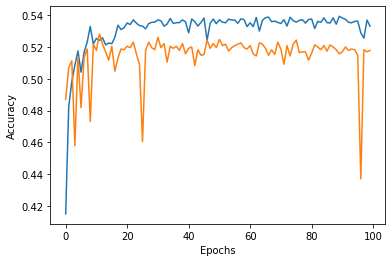

In [433]:
plt.plot(history.history['accuracy'],label='Accuracy')#bleu
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Prédiction 

In [434]:
unique = x_prediction.values
results = []
equal = []
victory = []
loss = []
i = 0
unique[1]

array(['2020-06-30', 'FINISHED', 274432, 'Vitória SC', 'Vitória FC', 5543,
       5620, 3593, 3593, 1.6428571428571428, 0.7857142857142857,
       1.1428571428571428, 1.25], dtype=object)

In [435]:
model.load_weights("model_Foot_Win.h5")

## Avec les 6 variables

In [436]:
for i in unique:
    predictions_final = model.predict(np.array([[i[5],i[6],i[7],i[8],i[9],i[10]]])) 
    egalite = predictions_final[0][0]*100
    victoire = predictions_final[0][1]*100
    perte = predictions_final[0][2]*100
    result = np.argmax(predictions_final)
    results.append(result)
    equal.append(egalite)
    victory.append(victoire)
    loss.append(perte)

## Avec toute les variables

In [415]:
for i in unique:
    predictions_final = model.predict(np.array([[i[6],i[7],i[8],i[9],i[10],i[11],i[12],i[13],i[14],i[15],i[16],i[17],i[18],i[19]]])) 
    egalite = predictions_final[0][0]*100
    victoire = predictions_final[0][1]*100
    perte = predictions_final[0][2]*100
    result = np.argmax(predictions_final)
    results.append(result)
    equal.append(egalite)
    victory.append(victoire)
    loss.append(perte)

IndexError: index 13 is out of bounds for axis 0 with size 13

In [437]:
df = {'date':x_prediction.date,'id_match':x_prediction.id_match,'status':x_prediction.status,'id_HomeTeam':x_prediction.idHomeTeam,'id_AwayTeam':x_prediction.idAwayTeam,
      'homeTeam':x_prediction.homeTeam,'AwayTeam':x_prediction.awayTeam,'prediction_egalité':equal,
      'prediction_homeTeam_victory':victory,'prediction_awayTeam_victory':loss,'match_state':results}
df = pd.DataFrame(df)
df

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,prediction_egalité,prediction_homeTeam_victory,prediction_awayTeam_victory,match_state
1082,2020-06-30,273885,FINISHED,81,78,FC Barcelona,Club Atlético de Madrid,1.445779e-29,100.000000,0.000000e+00,1
1980,2020-06-30,274432,FINISHED,5543,5620,Vitória SC,Vitória FC,6.985645e-09,100.000000,7.807315e-21,1
1982,2020-07-01,274433,FINISHED,5568,1049,Os Belenenses Futebol,CD Tondela,9.886616e-04,99.999011,1.771635e-09,1
1983,2020-07-01,274431,FINISHED,498,5533,Sporting Clube de Portugal,Gil Vicente FC,5.236865e-14,100.000000,8.913586e-35,1
1083,2020-07-01,273886,FINISHED,95,77,Valencia CF,Athletic Club,5.155097e-17,100.000000,0.000000e+00,1
...,...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,274477,SCHEDULED,1903,498,Sport Lisboa e Benfica,Sporting Clube de Portugal,6.787896e-15,100.000000,0.000000e+00,1
2025,2020-07-26,274478,SCHEDULED,5620,5568,Vitória FC,Os Belenenses Futebol,1.825221e-10,100.000000,1.554320e-24,1
2026,2020-07-26,274479,SCHEDULED,5530,5543,CD Santa Clara,Vitória SC,1.884723e-07,100.000000,1.255901e-17,1
2027,2020-07-26,274480,SCHEDULED,5601,5544,Portimonense SC,CD Aves,2.337465e-01,99.766231,2.561971e-05,1


In [438]:
d

,date,status,homeTeam,AwayTeam,prediction_egalite,prediction_homeTeam_victory,prediction_awayTeam_victory,match_state
0,2020-06-28,FINISHED,UC Sampdoria,Bologna FC 1909,26.98,37.20,35.74,1
1,2020-06-28,FINISHED,Udinese Calcio,Atalanta BC,15.65,24.65,59.70,2
2,2020-06-28,FINISHED,SSC Napoli,SPAL 2013,21.65,65.55,12.79,1
3,2020-06-28,FINISHED,Watford FC,Southampton FC,29.55,41.60,28.76,1
4,2020-06-28,FINISHED,AC Milan,AS Roma,23.12,32.97,43.89,2
...,...,...,...,...,...,...,...,...
290,2020-07-26,SCHEDULED,Sport Lisboa e Benfica,Sporting Clube de Portugal,29.40,44.83,25.71,1
291,2020-07-26,SCHEDULED,Vitória FC,Os Belenenses Futebol,26.15,53.70,20.13,1
292,2020-07-26,SCHEDULED,CD Santa Clara,Vitória SC,28.95,40.03,30.91,1
293,2020-07-26,SCHEDULED,Portimonense SC,CD Aves,29.53,43.36,27.05,1


In [439]:
d.to_csv('predictions_gain_perte.csv',index = False)
d.to_json (r'predictions_gain_perte.json')

In [440]:
# 'date':test_csv.date,'id_HomeTeam':test_csv.idHomeTeam,'id_AwayTeam':test_csv.idAwayTeam,'homeTeam':test_csv.homeTeam,'AwayTeam':test_csv.awayTeam,'prediction_egalite':equal,'prediction_homeTeam_victory':victory,'prediction_awayTeam_victory':loss,'match_state':results

In [441]:
np.asarray(equal)
np.asarray(victory)
np.asarray(loss)

array([0.00000000e+00, 7.80731473e-21, 1.77163527e-09, 8.91358554e-35,
       0.00000000e+00, 3.53850131e-15, 0.00000000e+00, 4.70373186e-18,
       0.00000000e+00, 1.65000930e-08, 9.05430952e-08, 6.02755137e-09,
       9.24398294e-12, 1.59242782e-20, 0.00000000e+00, 4.95835999e-01,
       4.03169928e-09, 8.67210674e-17, 0.00000000e+00, 8.71564224e-20,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.94467616e-14,
       0.00000000e+00, 0.00000000e+00, 2.53199675e-21, 3.01829894e-14,
       2.69908418e-20, 3.51569693e-18, 1.42660625e-18, 6.63363150e-25,
       0.00000000e+00, 0.00000000e+00, 1.21865474e-33, 6.17835806e-28,
       0.00000000e+00, 2.09185158e-07, 0.00000000e+00, 0.00000000e+00,
       5.49304724e+01, 0.00000000e+00, 9.73639502e-08, 8.42833529e-10,
       1.81687947e-16, 0.00000000e+00, 0.00000000e+00, 2.90457391e-15,
       7.56948540e-11, 0.00000000e+00, 1.01235314e-17, 6.38089825e-22,
       0.00000000e+00, 0.00000000e+00, 2.08233654e+01, 3.82159516e-35,
      

In [442]:
predictions1[0]

array([2.6889300e-01, 5.1489007e-01, 2.1558517e-01, 5.9796881e-04,
       3.3850691e-05], dtype=float32)

In [443]:
print(len(equal))
print(len(victory))
test_csv.homeTeam.shape

274
274


(295,)

In [444]:
df = {'date':test_csv.date,'status':test_csv.status,'homeTeam':test_csv.homeTeam,'AwayTeam':test_csv.awayTeam,'prediction_egalite':np.around(equal,decimals=2),'prediction_homeTeam_victory':np.around(victory,decimals=2),'prediction_awayTeam_victory':np.around(loss,decimals=2),'match_state':results}

In [445]:
finished = []
scheduled = []

In [446]:
for i in d.values:
    if i[1] == 'FINISHED':
        finished.append(i)
    else:
        scheduled.append(i)

In [447]:
column_names = ["date", "status", "homeTeam","AwayTeam","prediction_egalite","prediction_homeTeam_victory","prediction_awayTeam_victory","match_state"]
df_fini = pd.DataFrame(finished,columns = column_names)
df_programme = pd.DataFrame(scheduled,columns = column_names)

In [448]:
df_fini

,date,status,homeTeam,AwayTeam,prediction_egalite,prediction_homeTeam_victory,prediction_awayTeam_victory,match_state
0,2020-06-28,FINISHED,UC Sampdoria,Bologna FC 1909,26.98,37.20,35.74,1
1,2020-06-28,FINISHED,Udinese Calcio,Atalanta BC,15.65,24.65,59.70,2
2,2020-06-28,FINISHED,SSC Napoli,SPAL 2013,21.65,65.55,12.79,1
3,2020-06-28,FINISHED,Watford FC,Southampton FC,29.55,41.60,28.76,1
4,2020-06-28,FINISHED,AC Milan,AS Roma,23.12,32.97,43.89,2
...,...,...,...,...,...,...,...,...
80,2020-07-05,FINISHED,Brescia Calcio,Hellas Verona FC,27.52,37.87,34.53,1
81,2020-07-06,FINISHED,Tottenham Hotspur FC,Everton FC,26.19,54.87,18.93,1
82,2020-07-06,FINISHED,Sevilla FC,SD Eibar,23.76,60.08,16.16,1
83,2020-07-06,FINISHED,Levante UD,Real Sociedad de Fútbol,21.00,30.75,48.24,2


In [449]:
df_programme

,date,status,homeTeam,AwayTeam,prediction_egalite,prediction_homeTeam_victory,prediction_awayTeam_victory,match_state
0,2020-07-07,SCHEDULED,Crystal Palace FC,Chelsea FC,15.63,24.62,59.75,2
1,2020-07-07,SCHEDULED,Watford FC,Norwich City FC,29.35,46.29,24.32,1
2,2020-07-07,SCHEDULED,Arsenal FC,Leicester City FC,27.41,51.99,20.59,1
3,2020-07-08,SCHEDULED,Manchester City FC,Newcastle United FC,18.97,71.04,9.98,1
4,2020-07-08,SCHEDULED,Sheffield United FC,Wolverhampton Wanderers FC,19.48,29.09,51.42,2
...,...,...,...,...,...,...,...,...
205,2020-07-26,SCHEDULED,Sport Lisboa e Benfica,Sporting Clube de Portugal,29.40,44.83,25.71,1
206,2020-07-26,SCHEDULED,Vitória FC,Os Belenenses Futebol,26.15,53.70,20.13,1
207,2020-07-26,SCHEDULED,CD Santa Clara,Vitória SC,28.95,40.03,30.91,1
208,2020-07-26,SCHEDULED,Portimonense SC,CD Aves,29.53,43.36,27.05,1


In [450]:
df_fini.to_csv('predictions_gain_perte_finished.csv',index=False)
df_fini.to_json (r'predictions_gain_perte_finished.json')

In [451]:
df_programme.to_csv('predictions_gain_perte_scheduled.csv',index=False)
df_programme.to_json (r'predictions_gain_perte_scheduled.json')